# Functions and modules
In this lecture we will review the material covered in the tutorials on the basics of functions in python and modules. We'll basically practise writing a load of functions to do various things and then look at a couple of examples of things you can do with SciPy, another python module available through Anaconda. But first a short class quiz! Which of the following are True or False?

1) You can define functions to only except either positional or keyword arguments. *FALSE: positional vs keyword has nothing to do with how a function is defined, its only about how you call it.*

2) The order of keyword arguments when calling a function does not matter. *TRUE*

3) The scope of a variable is the parts of a program in which it can be accessed. *TRUE*

4) Namespaces in Python are used to modularize code and control variable scope. *TRUE*

5) Global variables cannot be accessed inside of a function. *FALSE*

6) Global variables cannot be changed inside of a function. *FALSE*

7) A local variable cannot be accessed outside of the function in which it is defined.*TRUE*

8) Functions can only return one value.*FALSE* 

## Practise writing functions
Recall how to declare a function. You may assume data is inputted correctly into the function. Make sure to document your functions properly
```
def <function name>:
    <function body>
```

In [8]:
# Write functions to perform vector arithmetic, treating input lists as vectors
# (vector addition, scalar multiplication, inner product)

def add_vecs(x,y):
    '''
    Returns elementwise sum of two vectors of the same dimension 
    '''
    z = []
    for i in range(len(x)):
        z.append(x[i]+y[i])
    return z

def mult_vec(a, x):
    '''
    Multiplies entries of a vector x by a scalar a 
    '''
    z = []
    for i in range(len(x)):
        z.append(a*x[i])
    return z

def inner_prod(x, y):
    '''
    Calculates inner product between two vectors x and y
    '''
    total = 0
    for i in range(len(x)):
        total += x[i]*y[i]
    return total

In [19]:
# Write a functions to compute the angle between two vectors represented as lists
import numpy as np

def angle_vec(x,y):
    '''
    Calculates angle in radians between two vectors x and y
    '''
    return np.arccos(inner_prod(x, y)/(np.sqrt(inner_prod(x, x)*inner_prod(y,y))))

In [24]:
# Go through some examples using these vector functions...

x = [0,-1]
y = [0,1]

theta = angle_vec(x,y)

3.141592653589793


## Some cool modules

### ScikitLearn is a Python module for machine learning
It is also available through your distribution of Anaconda! Here are some examples of the kinds of things you can do taken from the website
https://scikit-learn.org/stable/. Don't worry if you don't understand all the code, this is just to give you a flavour of the usefullness and power of some of these modules!


Automatically created module for IPython interactive environment


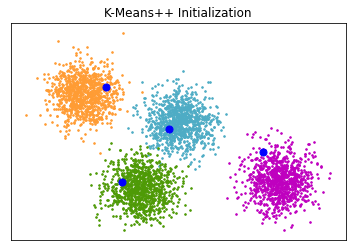

In [8]:
# Seeding for clustering

print(__doc__)

from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
n_samples = 4000
n_components = 4

X, y_true = make_blobs(n_samples=n_samples,
                       centers=n_components,
                       cluster_std=0.60,
                       random_state=0)
X = X[:, ::-1]

# Calculate seeds from kmeans++
centers_init, indices = kmeans_plusplus(X, n_clusters=4,
                                        random_state=0)

# Plot init seeds along side sample data
plt.figure(1)
colors = ['#4EACC5', '#FF9C34', '#4E9A06', 'm']

for k, col in enumerate(colors):
    cluster_data = y_true == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1],
                c=col, marker='.', s=10)

plt.scatter(centers_init[:, 0], centers_init[:, 1], c='b', s=50)
plt.title("K-Means++ Initialization")
plt.xticks([])
plt.yticks([])
plt.show()

Automatically created module for IPython interactive environment


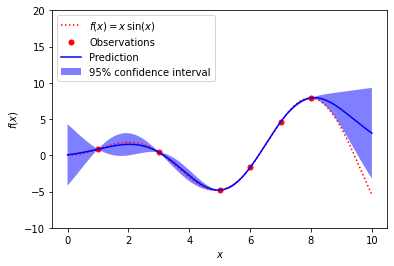

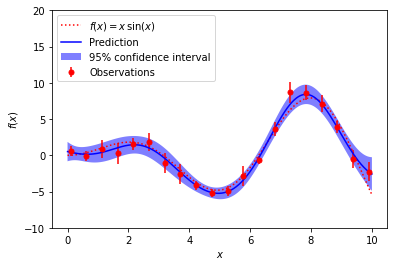

In [9]:
# Gaussian Process Regression

print(__doc__)

# Author: Vincent Dubourg <vincent.dubourg@gmail.com>
#         Jake Vanderplas <vanderplas@astro.washington.edu>
#         Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>s
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(1)


def f(x):
    """The function to predict."""
    return x * np.sin(x)


# ----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

# ----------------------------------------------------------------------
# now the noisy case
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

# Observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

# Instantiate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, alpha=dy ** 2,
                              n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()

### All very well, but how about other modules...?
There are many great Python libraries out there that aren't included on your Anaconda distribution. If you want to use them you are going to have to install them. Conda install is generally a safe way to do this, but as with anything you download, proceed with caution!

Suppose I want my computer to be able to translate my speech into text. Speech recognition is not an easy task... fortunately there are some great libraries out there that can do it for you! For instance

https://pypi.org/project/SpeechRecognition/

However this isn't available through Anaconda, so we are going to have to install it. To install packages its best to first create a virtual environment.

*A virtual environment is an isolated Python environment where a project's dependencies are installed in a different directory from those installed in the system's default Python path and other virtual environments. Dependency managers are tools that enable easy management of a project's dependencies.*

You can create a virtual environment either through your anaconda navigator or through command line. For the navigator I'll point you at the following link:

https://docs.anaconda.com/anaconda/navigator/getting-started

**The command line alternative**
1) To create a virtual environment via your termianal using conda do the following:

<code>conda create -n  VENV-NAME python= DIST </code>

For example to create a anaconda python 3.8 environment called “pic16a” you would type “conda create -n pic16a python=3.8 anaconda”

2) To activate a virtual environment type the following:

<code>source activate VENV-NAME </code>

3) To deactivate a virtual environment type:

<code>source deactivate</code>

4) To install packages to a specific virtual environment using conda type the following

<code>conda install -n VENV-NAME PACKAGE</code>


You won't have to use python environments in this course, although if you want to go for it! It's useful to be aware of them though as you progress in your Python journey however and you will use them if you take PIC16B.